In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import emcee
import corner
import batman
import copy
import time
from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec
import scipy.optimize as sciop

import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [2]:
data = ascii.read("./CDJ34_5Gyr_reformatted.txt")

In [3]:
print data.colnames

['System ID', 'Planet ID', 'Timestep', 'Core Mass [Mearth]', 'Envelope Mass [Mearth]', 'Total Mass [Mearth]', 'Surface Luminosity', 'Accretion rate of planetesimals', 'Accretion rate into envelope', 'Core Radius [Rjup]', 'Pressure at core-envelope interface [bar]', 'Temperature at core-envelope interface [K]', 'Gas density at core-envelope interface [g/cm^3]', 'Total Radius [Rjup]', 'Total Luminosity', 'Surface Pressure [bar]', 'Surface Temperature [K]', 'Semi Major Axis', 'Sound Speed', 'Mass of gas disc [Mearth]', 'Mass of the planetesimal disc [Mearth]', 'Hill sphere radius [RJ]', 'Bondi Radius', 'Timestep [yr]', 'Mean planetesimal surface density in Feeding zone', 'Nominal width of feeding zone [AU]', "Planetesimals' capture radius [RJ]", 'Disk midplane temperature in PLANETE. Equilibrium temperature in COMPLETO', 'Disk midplane pressure [bar]', 'Migration Type', 'Mass of ejected solids', 'Mass of accreted solids', 'Isolation mass in Earth masses', 'Gas surface density at planet po

In [4]:
ms = data['Total Mass [Mearth]']
rs = data['Total Radius [Rjup]']
smas = data['Semi Major Axis [AU]']
ls = data['Total Luminosity']

In [18]:
print np.min(rs)
print np.max(rs)

0.003494
1.104934


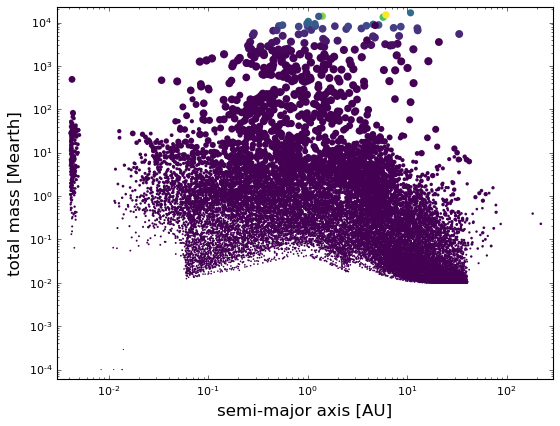

In [27]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(smas, ms, s=(rs*50)+1, c=ls, cmap='viridis',edgecolors="None")
ax.set_xlim(0.003,290.)
ax.set_ylim(0.00006,22530.)
ax.loglog()
ax.set_xlabel("semi-major axis [AU]",fontsize=15)
ax.set_ylabel("total mass [Mearth]",fontsize=15)
#plt.show()
plt.savefig("./mass_vs_sma.png",fmt="png")

In [3]:
print (1.*u.solRad).to(u.AU)

0.00465046726096 AU
